# Time Series ARIMA, Prophet, ADF, PACF 

In this project I want to deep dive on time series analysis to show how to review dada, how to preview it and how to do engineering.

I also want to explore some of the typical timeseries such as:

1. ACF/PACF
2. ARIMA
3. Auto-ARIMA
4. Prophet
5. Auhmented Dickey Fuller (ADF)

# Welcome

The Acea Group is one of the leading italian multiutility operator. Listed on italian stock exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is foremost italian operator in water services sector supplying 9M inhabitants in Lazio, Tuscani, Umbria, Molise, Campania. 

In this competition we will focus only on water sector to help Acea Group preserve precious waterbodies. As it is easy to imagine , a water supply company sttrugles with the need to forecast water level in a waterbody (Lake, water spring, river or aquifer) to handle daily consumption. During fall and winter waterbodies are refilled, but during summer and spring they start to drain. To help preserve the health of these waterbodies it is important to predict the most efficient water avalability, in terms of level and water flow for each day of year.



# Data

The reality is that each waterbody has such unique charecteristics that their attributes are not linked to each other. This analytics competition uses datasets that are completely independent to each other. However, it's critical to understand total availability in order to preserve water across country.

Each dataset represents a different kind of waterbody. As each waterbody is different from the other, the related features are also different. so if for instance we consider a water spring we notice that its different from those of a lake. These variances are expected based on unique behaviour and chrecteristic of each waterbody. The Acea group deals with 4 different types of waterbodies: water springs, lakes, rivers, aquifers.

# Challange

Can you build a story to predict the amount of water in each waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. To be more straightforward , gaining a better understanding of volume, they will be able to ensure water avalability for each time interval of year. The time interval is defined as day/mont depdending on available measures for each everybody. Models should capture volumes for each body (for instance for a model working on a monthly interval a forecast over month is expected).

The desired outcome is a notebook that can generate four mathematical models one for each category of waterbody (aquifers, water springs, rivers, lake) that might be applicable to each single body.

C:\Users\bkumarsingh\OneDrive - E2open, LLC\Attachments\AI\Projects\Kaggle\Asia smart water analytics

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Asia smart water analytics\\Aquifer_Petrignano.csv')
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [3]:
df.shape

(5223, 8)

In [4]:
df.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [5]:
# Remove old rows

df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)

df.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

In [6]:
df.shape

(4199, 8)

In [7]:
# Remove not useful columns

df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [8]:
# Simplify column names

df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometri']

df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometri
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [9]:
targets = ['depth_to_groundwater']

features = [feature for feature in df.columns if feature not in targets]

Since this is a timeseries problem we need to prase date column.

In [10]:
from datetime import datetime, date

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df.head().style.set_properties(subset=['date'], **{'background-color':'dodgerblue'})

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometri
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


# Data visualization

### Features:

Rainfall: Indicates quantity of rainfall.

Temparature: indicates the temperature.

Volume: indicates the volume taken from drinking water treatment plant (m 3).

Hydrometry: indicates the ground water level (m)

### Target:

Depth to groundwater: indicates the ground water level (m from the ground floor)

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

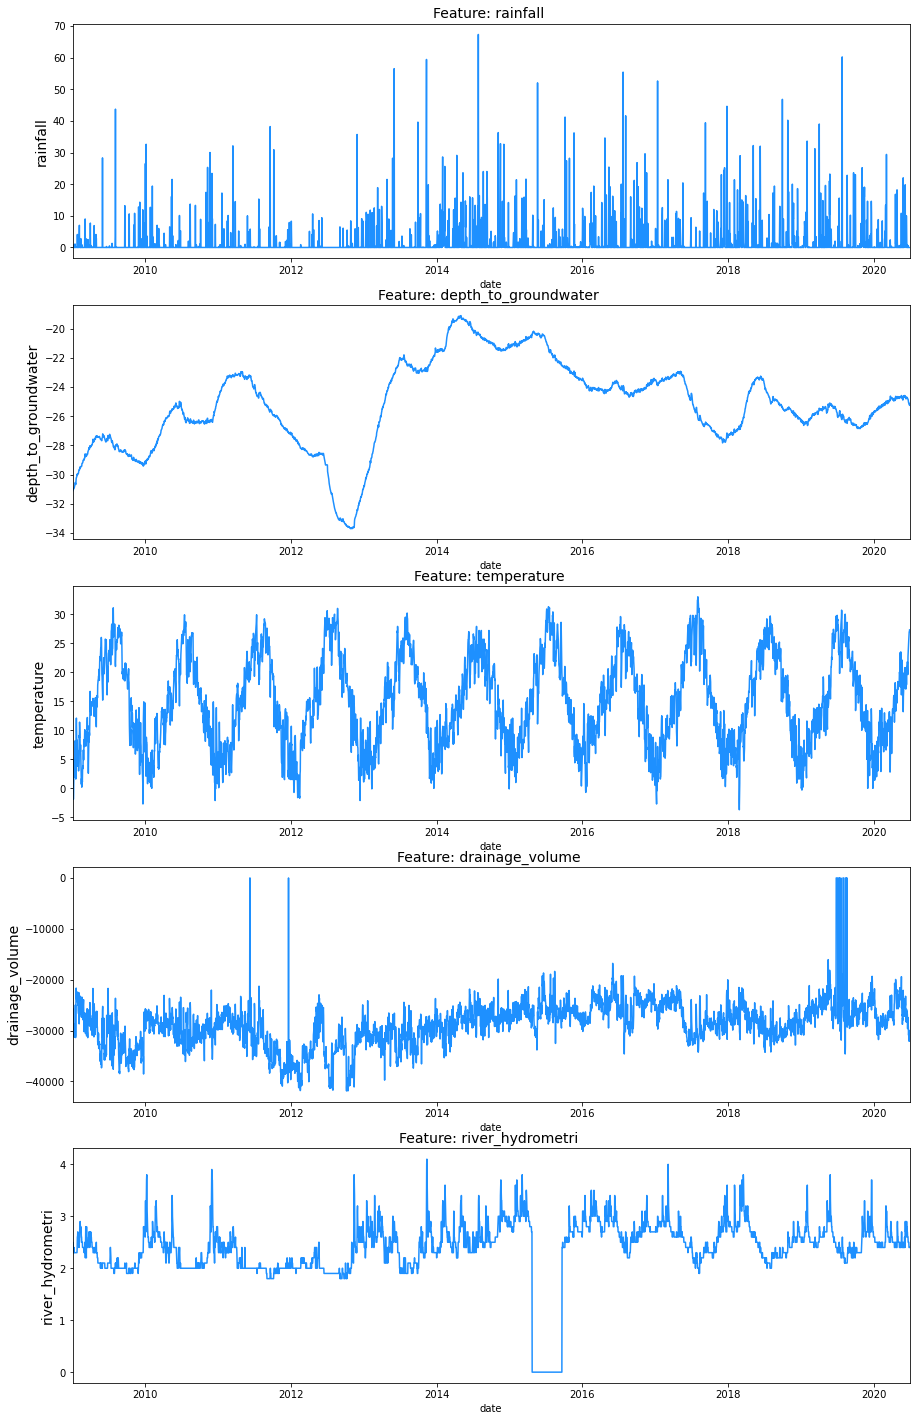

In [13]:
# To complete the data, as naive method, we will use ffill

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15,25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {} '.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2009,1,1), date(2020,6,30)])

# Data Preprocessing


## Choronological Order and Equidistant Timestamp

Data should be in chronological order and the time should be equidistant in time series. The chronological order can be achived by sorting dataframe by the timestamps. Equidistant timestamps indicates cconstant time intervals. To check this, difference between each timestamp can be taken. if this is not the case, you can decide on constant time interval and resample data.

But, first of all let's check if our data is well formatted.

In [14]:
df = df.sort_values(by='date')

In [15]:
df

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometri
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4


In [16]:
df['date'].shift(1)

0             NaT
1      2009-01-01
2      2009-01-02
3      2009-01-03
4      2009-01-04
          ...    
4194   2020-06-25
4195   2020-06-26
4196   2020-06-27
4197   2020-06-28
4198   2020-06-29
Name: date, Length: 4199, dtype: datetime64[ns]

In [17]:
# Check time interval

df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']]

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days
...,...,...
4194,2020-06-26,1 days
4195,2020-06-27,1 days
4196,2020-06-28,1 days
4197,2020-06-29,1 days


In [18]:
df['delta'].unique()

array([         'NaT', 86400000000000], dtype='timedelta64[ns]')

In [19]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

This is already the case in our data: the time interval is one day and data is already in chronological order. therefore we don't have to do this additional data processing step.

# Handle Missings

As we can see the dataset has some null values. 

Furthermore plotting the timeseries reveals that there seems to be some zero values that seems to be nulls for drainage volume and river hydrometry. we will have to clean them by replacing them by nan values and filling them afterwards.

In [20]:
df = df.drop('delta', axis=1)
df.isna().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometri         0
dtype: int64

In [21]:
import numpy as np

(14245.0, 18443.0)

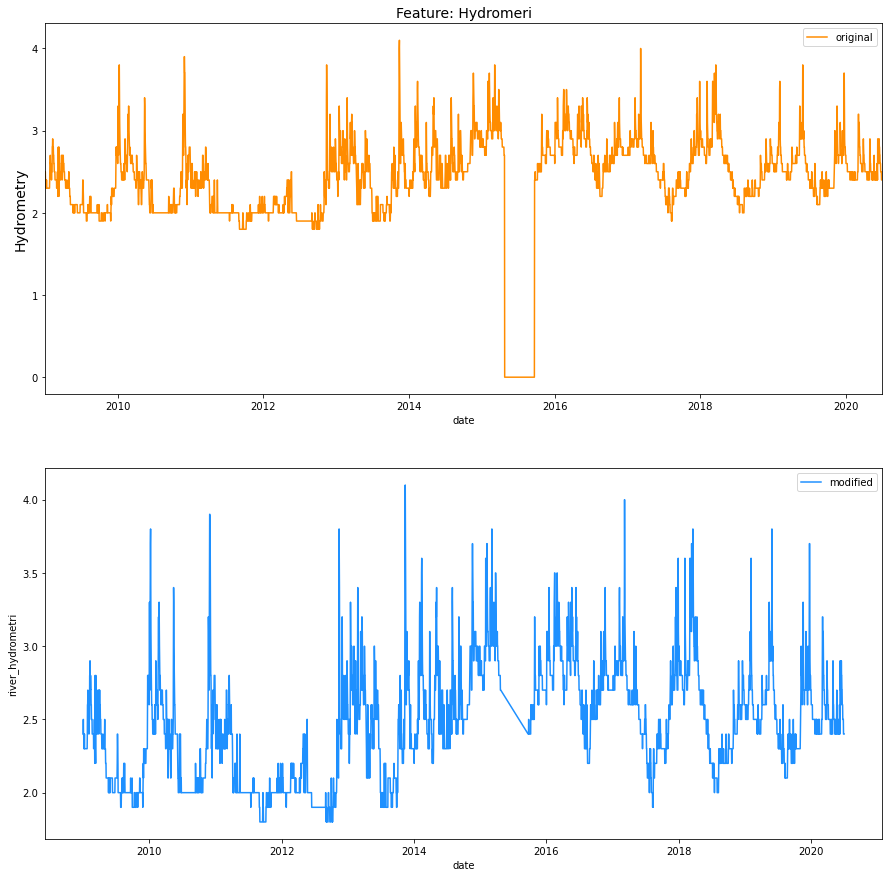

In [22]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

old_hydrometri = df['river_hydrometri'].copy()

df['river_hydrometri'] = df['river_hydrometri'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometri, ax=ax[0], color='darkorange', label='original')

sns.lineplot(x=df['date'], y=df['river_hydrometri'], color='dodgerblue', label='modified')

ax[0].set_title('Feature: Hydromeri', fontsize=14)

ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

ax[0].set_xlim([date(2009,1,1), date(2020, 6, 30)])



In [23]:
type(np.inf)

float

(14245.0, 18443.0)

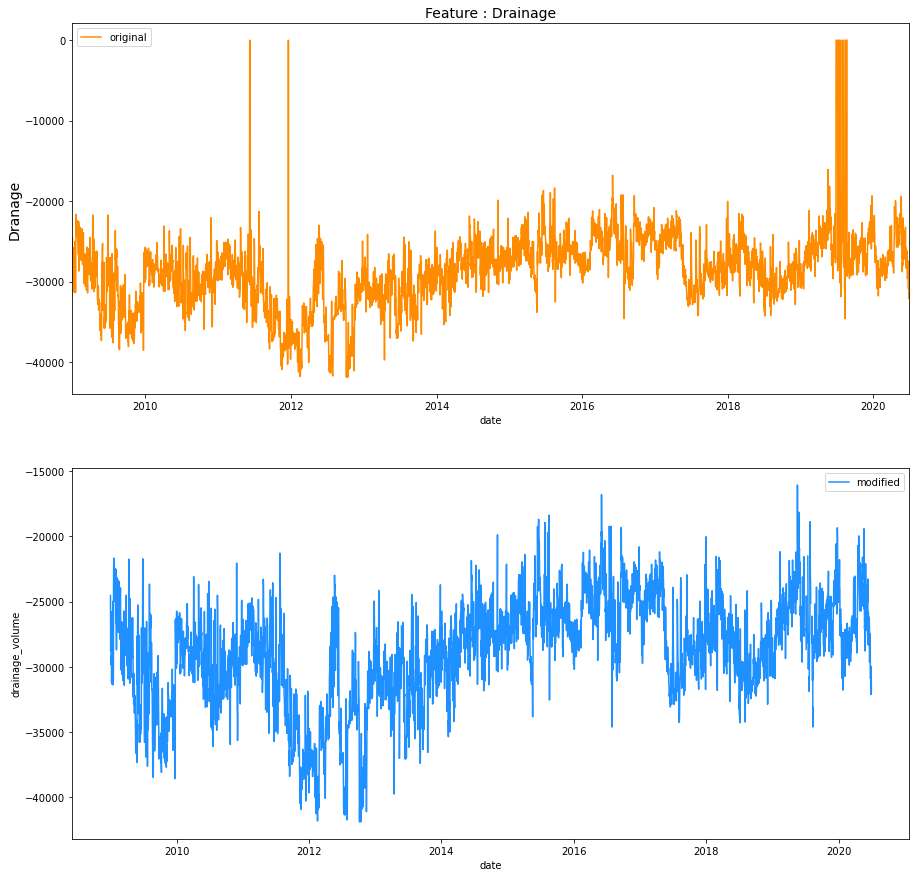

In [24]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

old_drainage = df['drainage_volume'].copy()

df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, color='darkorange', ax=ax[0], label='original')

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), color='dodgerblue', label='modified')

ax[0].set_title('Feature : Drainage', fontsize=14)
                                                                                                                                        
ax[0].set_ylabel(ylabel='Dranage', fontsize=14)

ax[0].set_xlim([date(2009,1,1), date(2020,6,30)])

So now we have to fix missing values. Lets take a look of these cases and explore what can we do with them.

In [25]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4189,4190,4191,4192,4193,4194,4195,4196,4197,4198
date,2009-01-01 00:00:00,2009-01-02 00:00:00,2009-01-03 00:00:00,2009-01-04 00:00:00,2009-01-05 00:00:00,2009-01-06 00:00:00,2009-01-07 00:00:00,2009-01-08 00:00:00,2009-01-09 00:00:00,2009-01-10 00:00:00,...,2020-06-21 00:00:00,2020-06-22 00:00:00,2020-06-23 00:00:00,2020-06-24 00:00:00,2020-06-25 00:00:00,2020-06-26 00:00:00,2020-06-27 00:00:00,2020-06-28 00:00:00,2020-06-29 00:00:00,2020-06-30 00:00:00
rainfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
depth_to_groundwater,-31.14,-31.11,-31.07,-31.05,-31.01,-31.0,-30.96,-30.94,-30.93,-30.87,...,-24.82,-24.83,-24.88,-24.97,-25.07,-25.07,-25.11,-25.19,-25.18,-25.25
temperature,5.2,2.3,4.4,0.8,-1.9,-0.7,1.5,4.3,4.9,1.9,...,19.6,22.7,23.5,24.2,25.3,25.7,26.2,26.9,26.9,27.3
drainage_volume,-24530.688,-28785.888,-25766.208,-27919.296,-29854.656,-29124.576,-31173.12,-30232.224,-30597.696,-31337.28,...,-27689.472,-27432.864,-28360.8,-29708.64,-30923.424,-29930.688,-31332.96,-32120.928,-30602.88,-31878.144
river_hydrometri,2.4,2.5,2.4,2.4,2.3,2.3,2.3,2.4,2.3,2.3,...,2.6,2.6,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4


In [26]:
df.T.isna

<bound method DataFrame.isna of                                      0                    1     \
date                  2009-01-01 00:00:00  2009-01-02 00:00:00   
rainfall                              0.0                  0.0   
depth_to_groundwater               -31.14               -31.11   
temperature                           5.2                  2.3   
drainage_volume                -24530.688           -28785.888   
river_hydrometri                      2.4                  2.5   

                                     2                    3     \
date                  2009-01-03 00:00:00  2009-01-04 00:00:00   
rainfall                              0.0                  0.0   
depth_to_groundwater               -31.07               -31.05   
temperature                           4.4                  0.8   
drainage_volume                -25766.208           -27919.296   
river_hydrometri                      2.4                  2.4   

                                     4    

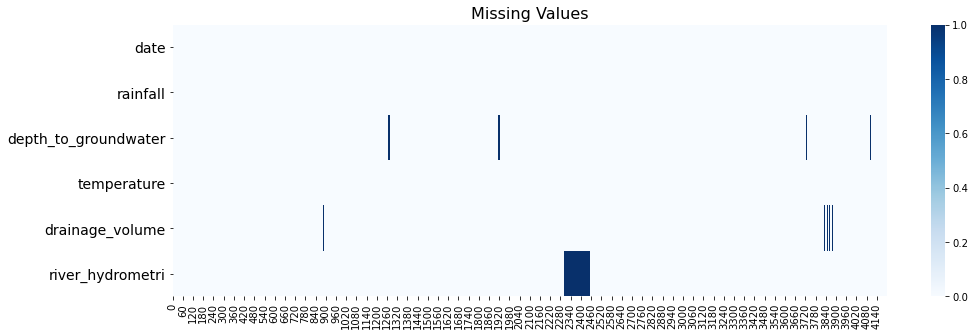

In [27]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')

ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

plt.show()

## Missing values, how to handle

## . Option 1: Fill NaN with outlier or zero

In this specific exapmle filling the missing value with an outlier value such as np.inf or 0 seems to be very naive.
However, using value like -999, is sometimes a good idea.

## . Option 2: Fill NaN with mean value

Filling NaNs with mean value is also not sufficient and naive, and does not seem to be a good option

## . Option 3: Fill NaN with last value with .ffill()

Filling NaN with last value could be bit better

## . Option 4: Fill NaN with linearly interpolated value with .interpolate()

Filling NaN with the interpolated values is the best option in this small example but it requires knowledge of neighbouring value.

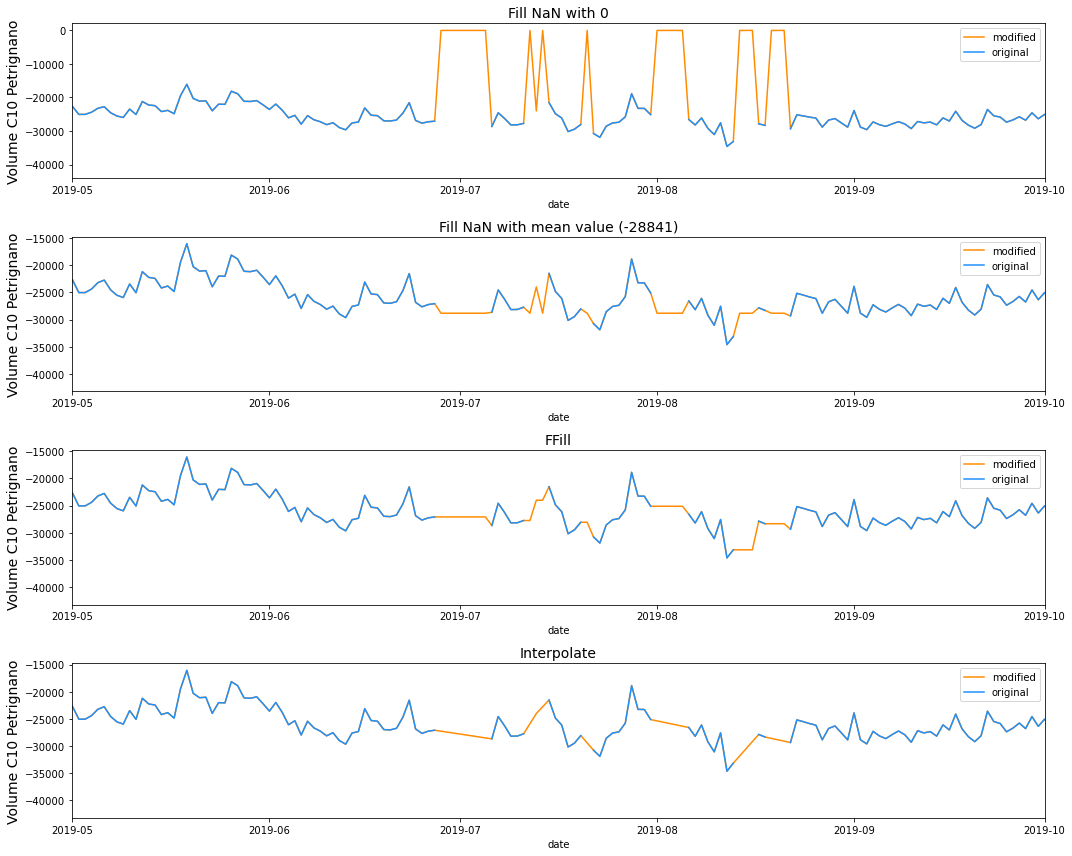

In [28]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,12))

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label='modified')

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='original')

ax[0].set_title('Fill NaN with 0', fontsize=14)

ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['drainage_volume'].mean()

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label='modified')

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='original')

ax[1].set_title(f'Fill NaN with mean value ({mean_drainage:0.0f})', fontsize=14)

ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label='modified')

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label='original')

ax[2].set_title(f'FFill', fontsize=14)

ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label='modified')

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label='original')

ax[3].set_title(f'Interpolate', fontsize=14)

ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i]. set_xlim([date(2019,5,1), date(2019, 10, 1)])
    
plt.tight_layout()

plt.show()

As we can see, the best option in this case seems to be best option!

So, let's interpolate missing values.

In [29]:
df['drainage_volume'] = df['drainage_volume'].interpolate()

df['river_hydrometri'] = df['river_hydrometri'].interpolate()

df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

In [30]:
df.isnull().sum()

date                    0
rainfall                0
depth_to_groundwater    0
temperature             0
drainage_volume         0
river_hydrometri        0
dtype: int64

# Smoothing data / Resampling

Resampling can provide additional information on data. There are two types of resampling.

## 1. Upsampling
is when fequency of samples is inceresed (eg. days to hours)

## 2. Downsampling

is when frequency of samples is decreased (eg. days to weeks)

In this example, we will do some downsampling with the .resample() function (similar to group by and aggregate as mean).



In [31]:
df[['date', 'drainage_volume']]

,date,drainage_volume
0,2009-01-01,-24530.688
1,2009-01-02,-28785.888
2,2009-01-03,-25766.208
3,2009-01-04,-27919.296
4,2009-01-05,-29854.656
...,...,...
4194,2020-06-26,-29930.688
4195,2020-06-27,-31332.960
4196,2020-06-28,-32120.928
4197,2020-06-29,-30602.880


In [32]:
df[['date', 'drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)

,date,drainage_volume
0,2009-01-01,-197154.432
1,2009-01-08,-208290.528
2,2009-01-15,-178242.336
3,2009-01-22,-166980.960
4,2009-01-29,-176473.728
...,...,...
595,2020-05-28,-179137.440
596,2020-06-04,-171969.696
597,2020-06-11,-190248.912
598,2020-06-18,-196210.944


C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

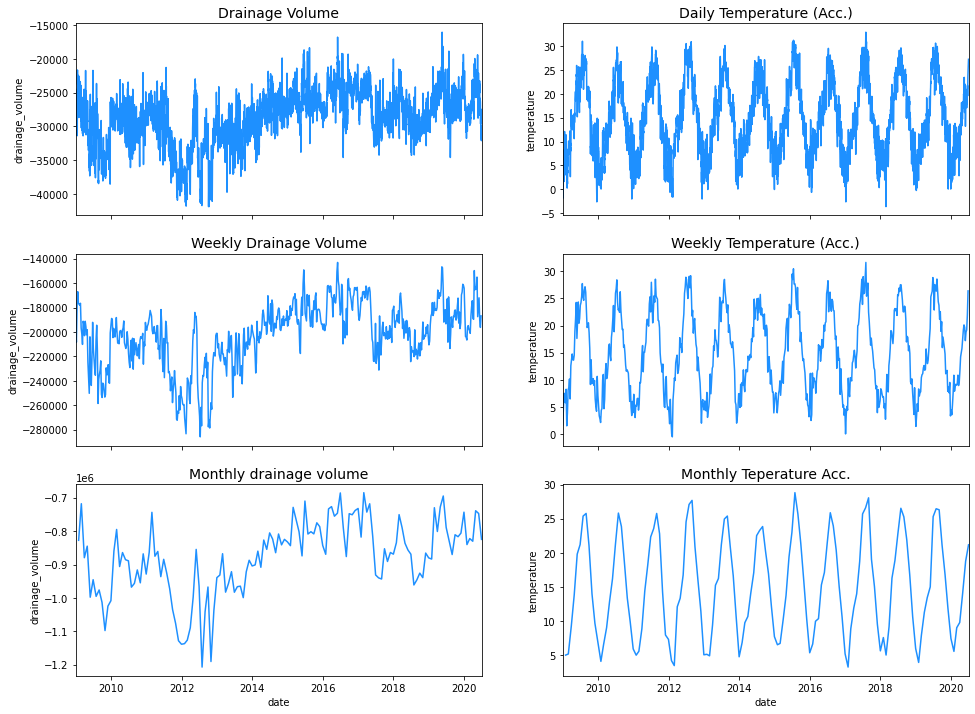

In [33]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(df['date'], df['drainage_volume'], color='dodgerblue', ax=ax[0,0])

ax[0,0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['date', 'drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)

sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1,0])

ax[1,0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['date', 'drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)

sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2,0])

ax[2,0].set_title('Monthly drainage volume', fontsize=14)

for i in range(3):
    ax[i,0].set_xlim([date(2009,1,1), date(2020, 6, 30)])
    
sns.lineplot(df['date'], df['temperature'], color='dodgerblue', ax=ax[0,1] )

ax[0,1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['date', 'temperature']].resample('7D', on='date').mean().reset_index(drop=False)

sns.lineplot(resampled_df['date'], resampled_df['temperature'], color='dodgerblue', ax=ax[1,1])

ax[1,1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['date', 'temperature']].resample('M', on='date').mean().reset_index(drop=False)

sns.lineplot(resampled_df['date'], resampled_df['temperature'], color='dodgerblue', ax=ax[2,1])

ax[2,1].set_title('Monthly Teperature Acc.', fontsize=14)

for i in range(3):
    ax[i,1].set_xlim([date(2009,1,1), date(2020,6,30)])
    
plt.show()

In [34]:
df.columns

Index(['date', 'rainfall', 'depth_to_groundwater', 'temperature',
       'drainage_volume', 'river_hydrometri'],
      dtype='object')

In [35]:
# As we can see downsample to week level smoothen the data and help analysis

downsample = df[['date','depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometri', 'rainfall']].resample('7D', on='date').mean().reset_index(drop=False)

In [36]:
df = downsample.copy()

In [37]:
df

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometri,rainfall
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286
...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000
597,2020-06-11,-24.751429,19.200000,-27178.416000,2.771429,2.857143
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000


# 2.3 - Stationarity

Some timeseries models, such as ARIMA assumes that the underlying data is stationary. Stationary describe that timeseries has:

1. costant mean and mean is not time dependent

2. costant variance and variance is not time dependent

3. constant covariance and covariance is not time depedent

Check for stationary can be done via three approaches.

1. Visually - Plot time series and check for trend and seasonality

2. basic statistics - split the time series and compare mean and variance of each partition

3. statistical test - Augumented Dickey Fuller test



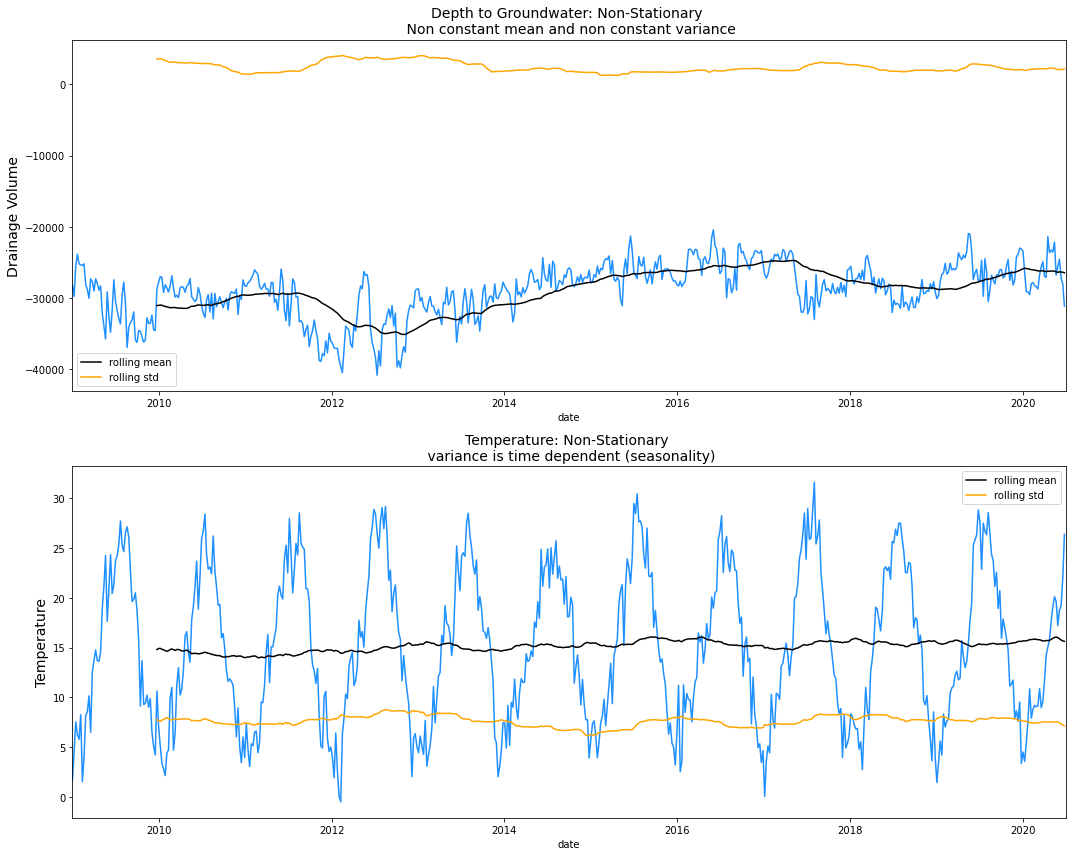

In [38]:
# A year has 52 weeks (52 weeks * 7 days per week) approx.

rolling_window = 52

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,12))

sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).std(),ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-Stationary \n Non constant mean and non constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009,1,1), date(2020,6,30)])

sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-Stationary \n variance is time dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009,1,1), date(2020,6,30)])

plt.tight_layout()
plt.show()

In this visual check we can see that features dont's have constant mean and std but they are close to it.

## Unit root test

Unit root is a charecteristics of a time series that makes it non-stationary. And ADF test bilong to unit root test. 

Technically, a unit root said to exists in a timeseries of value of alpha=1 in below equation.

Yt = alpha*Yt-1 + beta*Xe + epsilon

where Yt is value of timeseries at time t and Xe is an exogenous variable.

### The presence of unit root mean that the time series is not stationary.

## 2.3.1 Augumented Dickey Fuller (ADF)


### Augumented Dickey Fuller

It's type of stastical test called unit root test. unit root are a cause of non-stationary.

###   . Null Hypothesis 
        
        Time series has a unit root. (Time series is not stationary)
        
###   . Alternate hypothesis

        Time series has no unit root. (Time series is stationary)
        
#### If the null hypothesis can be rejected, we can conclude that time series is stationary.


There are two ways to reject null hypothesis:

On the one hand, null hypothesis can be rejected if p-value is below a set significance level. the default significance level is 5%.

p_value is greater than significance level (default: 0.5): Failed to reject null hypothesis (H0). data has unit root and it's not stationary.

On the other hand, null hypothesis can be rejected if test statistics is less than critical value.

ADF ststistc > critical value: Fail to reject null hypoyhesis. Data has unit root and it's not stationary. 

ADF statistics < critical value: Reject null hypothesis (H0). The data doesn't have a unit root and it's stationary.



In [39]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['depth_to_groundwater'].values)

result

(-2.880201649316665,
 0.04769919092020829,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877625)

Now, we are going to check for each variable. 

1. P value is less than 0.05

2. Check the range of the ADF statistic compared with critical values.

In [40]:

def visualize_adfuller_results(series, title, ax):
    
    result = adfuller(series)
    
    significance_level=0.05
    
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']
     
    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & ((adf_stat < crit_val_5)):
        linecolor='orange'
    elif (p_val < significance_level) & ((adf_stat < crit_val_10)):
        linecolor = 'red'
    else:
        linecolor='purple'
        
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    
    ax.set_title(f'ADF Statistic: {adf_stat:0.3f}, P Value: {p_val:0.3f}\n Critical Values 1% {crit_val_1:0.3f}, 5% {crit_val_5:0.3f}, 10% {crit_val_10:0.3f}')
    
    ax.set_ylabel(ylabel=title, fontsize=14)

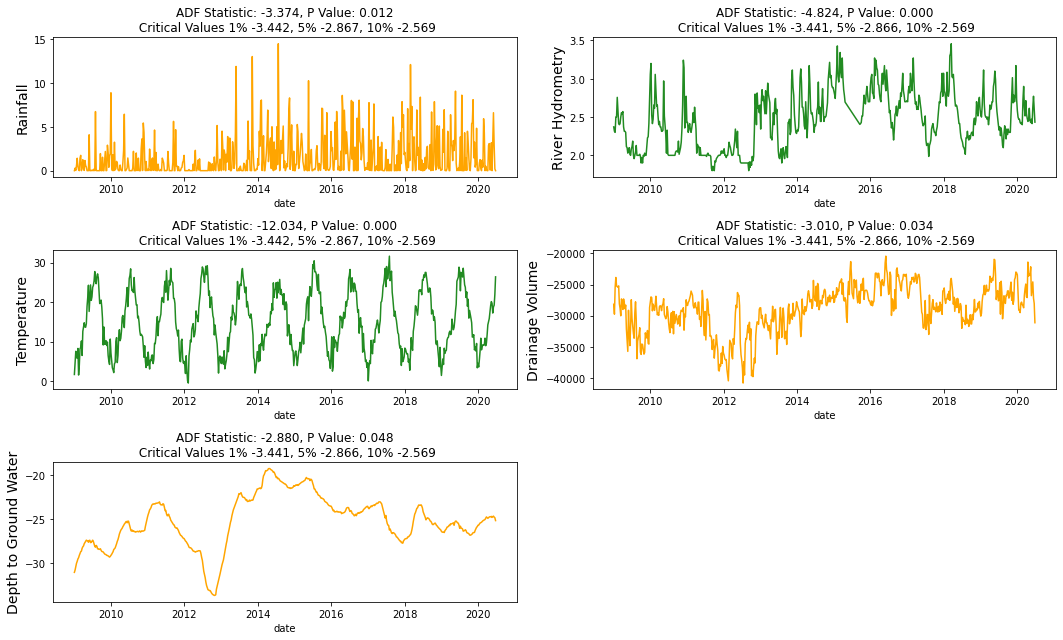

In [41]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,9))

visualize_adfuller_results(df['rainfall'].values, 'Rainfall', ax[0,0] )
visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1,0])
visualize_adfuller_results(df['river_hydrometri'].values, 'River Hydrometry', ax[0,1])
visualize_adfuller_results(df['drainage_volume'].values, 'Drainage Volume', ax[1,1])
visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth to Ground Water', ax[2,0])

f.delaxes(ax[2,1])
plt.tight_layout()
plt.show()

If data is not stationary but we want to use a model such as ARIMA (which requires this charecteristic), data has to be transforned.

## Transformation:

Log or square root to stabilize non constant variance 

## Differencing

Substract the current value with previous



C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


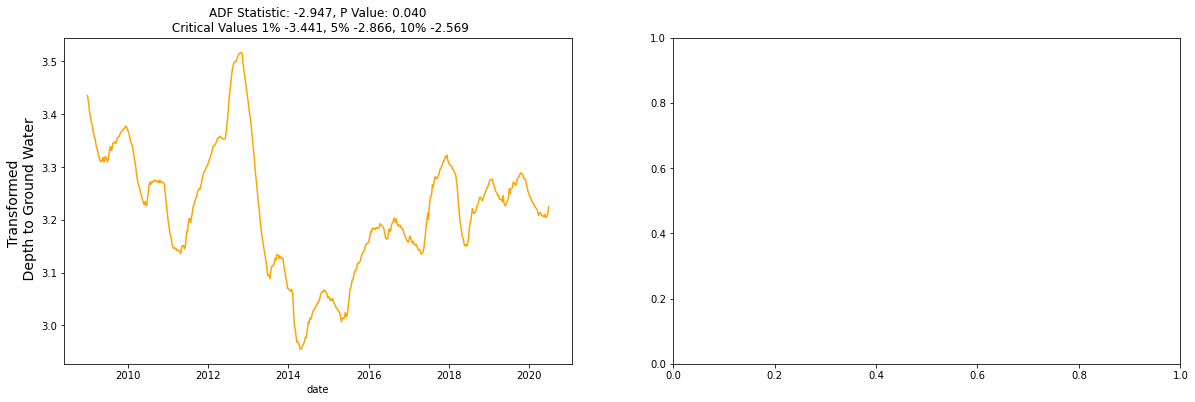

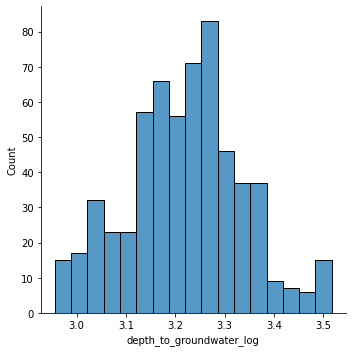

In [42]:
# Log transform of absolute values

# Log transform of negative values will return nan

df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

visualize_adfuller_results(df['depth_to_groundwater_log'].values, 'Transformed \n Depth to Ground Water', ax=ax[0])

sns.displot(df['depth_to_groundwater_log'], ax=ax[1])

plt.show()

Differencing can be done in different orders

First order differencing: linear trends with Zi = Yi - Yi-1

Second order differencing: quadatric trends with Zi = (Yi - Yi-1) - (Yi-1 - Yi-2)

and so on..

In [43]:
df['depth_to_groundwater']

0     -31.048571
1     -30.784286
2     -30.420000
3     -30.018571
4     -29.790000
         ...    
595   -24.697143
596   -24.638571
597   -24.751429
598   -24.822857
599   -25.145000
Name: depth_to_groundwater, Length: 600, dtype: float64

In [44]:
# First order differencing

ts_diff = np.diff(df['depth_to_groundwater'])

ts_diff

array([ 2.64285714e-01,  3.64285714e-01,  4.01428571e-01,  2.28571429e-01,
        2.67142857e-01,  1.47142857e-01,  2.64285714e-01,  2.20000000e-01,
        1.97142857e-01,  6.85714286e-02,  3.20000000e-01,  1.74285714e-01,
        9.85714286e-02,  2.48571429e-01,  1.40000000e-01,  1.50000000e-01,
        1.15714286e-01, -5.14285714e-02, -3.28571429e-02, -1.52857143e-01,
        2.10000000e-01,  1.42857143e-02, -2.64285714e-01,  2.42857143e-02,
        1.24285714e-01,  1.30000000e-01, -1.50000000e-01, -2.64285714e-01,
       -2.84285714e-01, -1.10000000e-01,  2.10000000e-01, -9.85714286e-02,
       -2.92857143e-01,  2.85714286e-03, -6.85714286e-02,  1.71428571e-02,
        6.00000000e-02, -1.82857143e-01, -1.25714286e-01, -3.42857143e-02,
       -2.42857143e-02, -1.04285714e-01, -1.21428571e-01, -4.85714286e-02,
       -2.71428571e-02, -8.71428571e-02, -1.42857143e-02, -4.85714286e-02,
       -7.00000000e-02, -6.57142857e-02,  8.14285714e-02,  1.10000000e-01,
        1.25714286e-01,  

In [45]:
df['depth_to_groundwater_diff_1']  = np.append([0], ts_diff)
df

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometri,rainfall,depth_to_groundwater_log,depth_to_groundwater_diff_1
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,3.435553,0.000000
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,3.427004,0.264286
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,3.415100,0.364286
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,3.401816,0.401429
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,3.394173,0.228571
...,...,...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286,3.206688,0.088571
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000,3.204313,0.058571
597,2020-06-11,-24.751429,19.200000,-27178.416000,2.771429,2.857143,3.208883,-0.112857
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000,3.211765,-0.071429


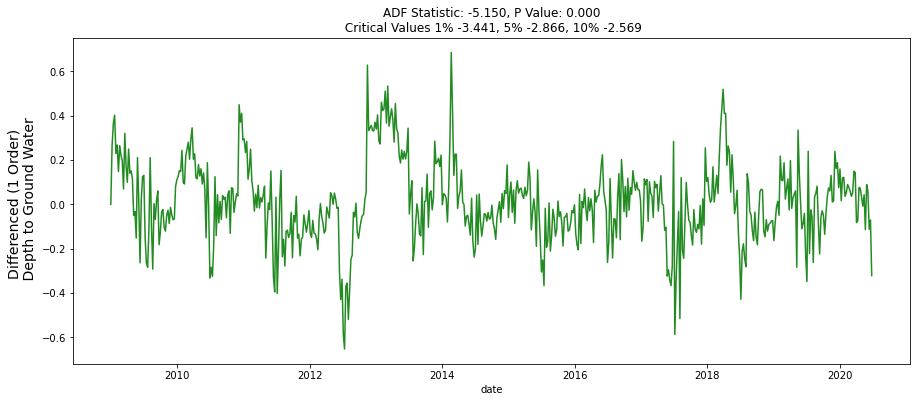

In [46]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))

visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1 Order) \n Depth to Ground Water', ax)

# Feature Engineering



In [47]:
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['day_of_year'] = pd.DatetimeIndex(df.date).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df.date).weekofyear
df['quarter'] = pd.DatetimeIndex(df.date).quarter
df['season'] = df['month'] % 12 // 3 + 1

<ipython-input-47-2fc8d5d7798e>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = pd.DatetimeIndex(df.date).weekofyear


In [48]:
df

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometri,rainfall,depth_to_groundwater_log,depth_to_groundwater_diff_1,year,month,day,day_of_year,week_of_year,quarter,season
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,3.435553,0.000000,2009,1,1,1,1,1,1
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,3.427004,0.264286,2009,1,8,8,2,1,1
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,3.415100,0.364286,2009,1,15,15,3,1,1
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,3.401816,0.401429,2009,1,22,22,4,1,1
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,3.394173,0.228571,2009,1,29,29,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286,3.206688,0.088571,2020,5,28,149,22,2,2
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000,3.204313,0.058571,2020,6,4,156,23,2,3
597,2020-06-11,-24.751429,19.200000,-27178.416000,2.771429,2.857143,3.208883,-0.112857,2020,6,11,163,24,2,3
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000,3.211765,-0.071429,2020,6,18,170,25,2,3


# 3.1 Encoding Cyclic Features

The new time features are cyclic. for example feature month cycles between 1 and 12 for every year. While difference between  each month increment by 1 during the year, between two year month jumps from 12 (December) to 1 (January). This resilt is -11 which can confuse the model.  

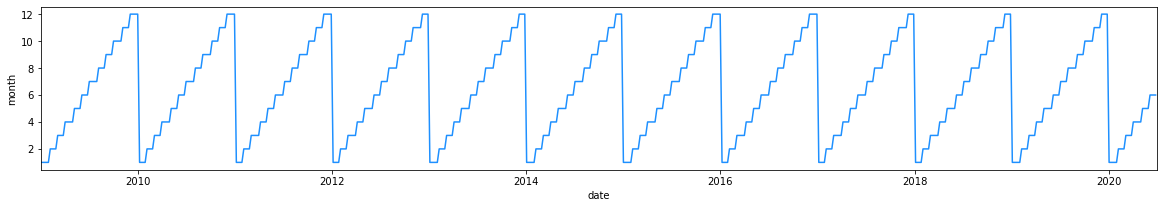

In [49]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')

ax.set_xlim([date(2009,1,1), date(2020,6,30)])

plt.show()

Lets encode cyclic features.

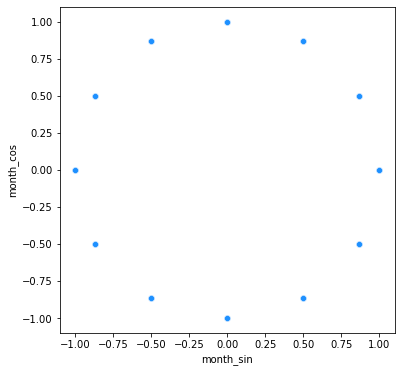

In [50]:
month_in_year = 12

df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)

df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')

plt.show()

# 3.2 Timeseries Decomposition


The series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

1. Level - The average value in series

2. Trend - The increasing or decreasing value in series

3. Seasonality - The repeating short term cycles in series

4. Noise - The random variation in series


Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problem during time series analysis and forecasting. 


All series have a level and noise.

It's helpful to think of components as combining either additively or multiplicatevely.

Additive (Yt)  = Level + Trend + Seasonality + Noise

Multiplicative (Yt) = Level * Trend * Seasonality * Noise

In this case we are going to use function seasonal_decompose() from statsmodel library. 

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns = ['rainfall', 'temperature', 'drainage_volume', 'river_hydrometri', 'depth_to_groundwater']

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

<ipython-input-52-5d48cf2b871a>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')
<ipython-input-52-5d48cf2b871a>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')


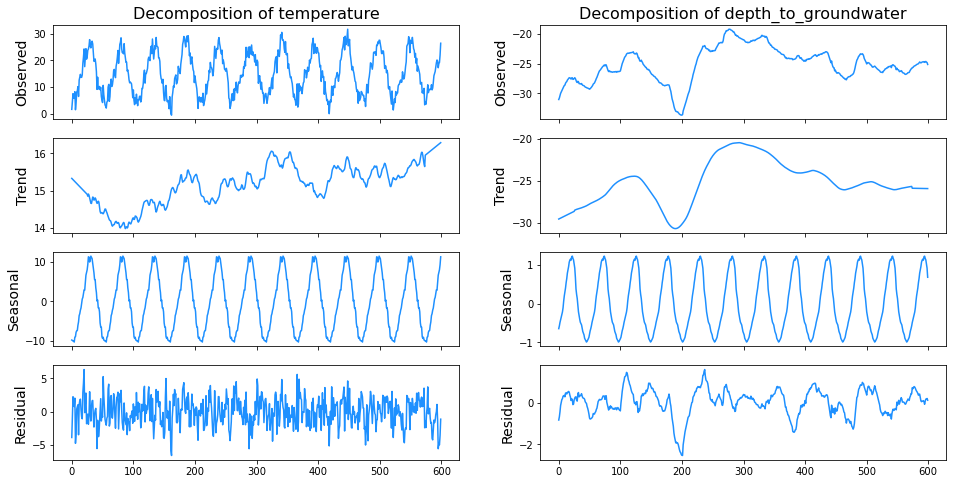

In [52]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(16,8))

for i, column in enumerate(['temperature', 'depth_to_groundwater']):
    
    res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')
    
    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)
    
    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)
    
    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel ('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)
    
plt.show()

# 3.3 Lag

We want to calculate each variable with a shift() (lag) to compare the correlation with other variables. 

In [53]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2*weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1*weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1*weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2*weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3*weeks_in_month)

In [54]:
df

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometri,rainfall,depth_to_groundwater_log,depth_to_groundwater_diff_1,year,month,...,river_hydrometri_seasonal_shift_b_2m,river_hydrometri_seasonal_shift_b_1m,river_hydrometri_seasonal_shift_1m,river_hydrometri_seasonal_shift_2m,river_hydrometri_seasonal_shift_3m,depth_to_groundwater_seasonal_shift_b_2m,depth_to_groundwater_seasonal_shift_b_1m,depth_to_groundwater_seasonal_shift_1m,depth_to_groundwater_seasonal_shift_2m,depth_to_groundwater_seasonal_shift_3m
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,3.435553,0.000000,2009,1,...,0.206555,0.152668,NaN,NaN,NaN,0.066340,-0.362900,NaN,NaN,NaN
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,3.427004,0.264286,2009,1,...,0.210803,0.235327,NaN,NaN,NaN,0.203030,-0.275904,NaN,NaN,NaN
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,3.415100,0.364286,2009,1,...,0.318394,0.312137,NaN,NaN,NaN,0.304813,-0.212800,NaN,NaN,NaN
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,3.401816,0.401429,2009,1,...,0.292617,0.260525,NaN,NaN,NaN,0.407139,-0.103563,NaN,NaN,NaN
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,3.394173,0.228571,2009,1,...,0.200299,0.206555,0.207547,NaN,NaN,0.545598,0.066340,-0.643767,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286,3.206688,0.088571,2020,5,...,NaN,-0.198010,0.130296,0.028876,0.292617,NaN,0.683336,1.151098,0.873197,0.407139
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000,3.204313,0.058571,2020,6,...,NaN,NaN,0.057642,0.018541,0.200299,NaN,NaN,1.125191,0.959351,0.545598
597,2020-06-11,-24.751429,19.200000,-27178.416000,2.771429,2.857143,3.208883,-0.112857,2020,6,...,NaN,NaN,0.041844,0.048430,0.178117,NaN,NaN,1.214288,1.072966,0.651125
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000,3.211765,-0.071429,2020,6,...,NaN,NaN,0.019143,0.085895,0.097544,NaN,NaN,1.230009,1.124783,0.789970


# 4. Exploratory Data Analysis

Now, we are going to plot data and try to extract some knowledge.

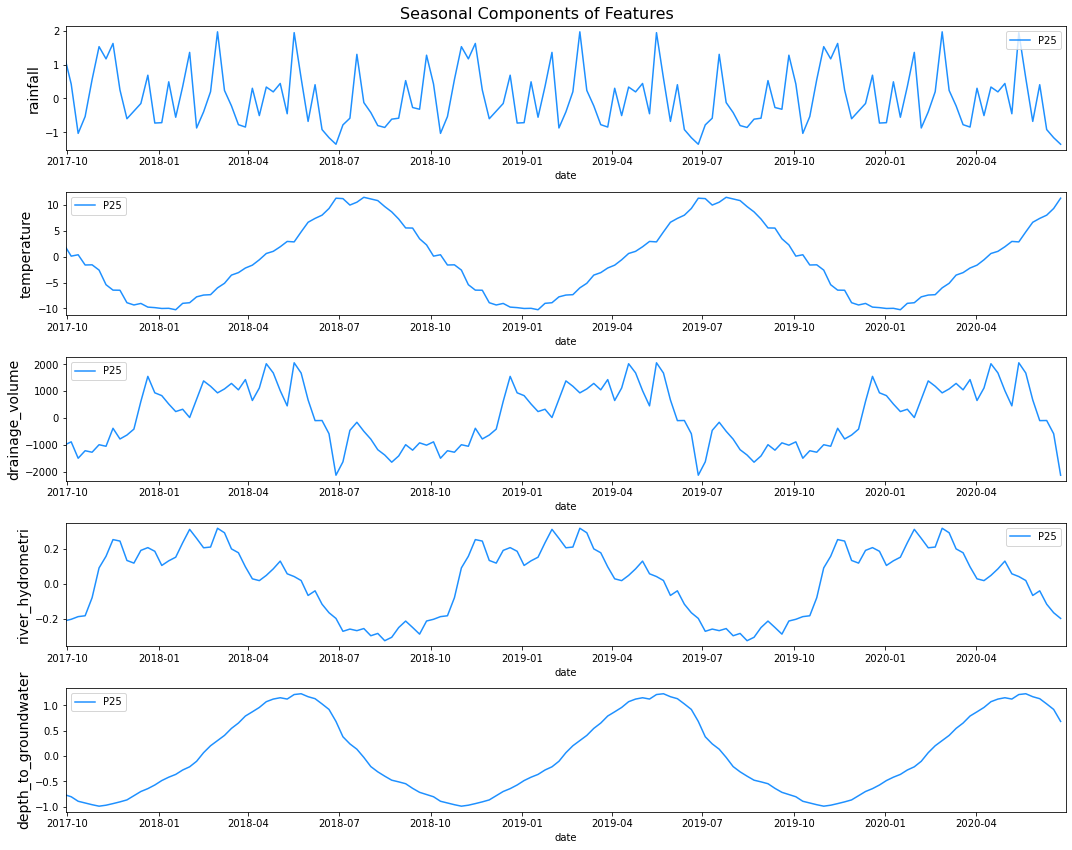

In [55]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15,12))

f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9,30), date(2020,6,30)])
plt.tight_layout()
plt.show()

### As we can see

Depth to Groundwater: Reaches it's maximum during may/jun and its minimum around november.

temperature: Reaches to it's maximum around august and minimum around  january

drainage volume: Reaches it's minumum during july

river hydrometry: reaches it's maximum around february / march and minimum around september

In [56]:
df.columns

Index(['date', 'depth_to_groundwater', 'temperature', 'drainage_volume',
       'river_hydrometri', 'rainfall', 'depth_to_groundwater_log',
       'depth_to_groundwater_diff_1', 'year', 'month', 'day', 'day_of_year',
       'week_of_year', 'quarter', 'season', 'month_sin', 'month_cos',
       'rainfall_trend', 'rainfall_seasonal', 'temperature_trend',
       'temperature_seasonal', 'drainage_volume_trend',
       'drainage_volume_seasonal', 'river_hydrometri_trend',
       'river_hydrometri_seasonal', 'depth_to_groundwater_trend',
       'depth_to_groundwater_seasonal', 'rainfall_seasonal_shift_b_2m',
       'rainfall_seasonal_shift_b_1m', 'rainfall_seasonal_shift_1m',
       'rainfall_seasonal_shift_2m', 'rainfall_seasonal_shift_3m',
       'temperature_seasonal_shift_b_2m', 'temperature_seasonal_shift_b_1m',
       'temperature_seasonal_shift_1m', 'temperature_seasonal_shift_2m',
       'temperature_seasonal_shift_3m', 'drainage_volume_seasonal_shift_b_2m',
       'drainage_volume_se

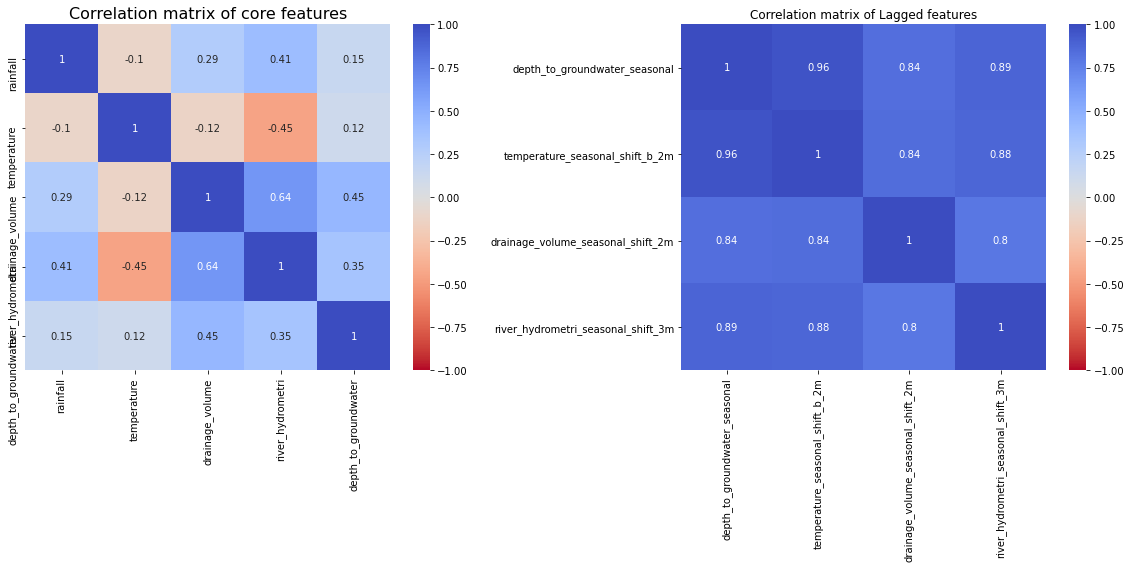

In [57]:
f, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])

ax[0].set_title('Correlation matrix of core features', fontsize=16)

shifted_cols = ['depth_to_groundwater_seasonal', 'temperature_seasonal_shift_b_2m', 'drainage_volume_seasonal_shift_2m', 'river_hydrometri_seasonal_shift_3m']

corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])

ax[1].set_title('Correlation matrix of Lagged features')

plt.tight_layout()

plt.show()

As we can see features are higher correlated in case of shifted features (lagged one) than the original ones.

# Autocorrelation Analysis

ACF and PCF Plots: After a time series has been stationarized by differencing, the next step is the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in diffrenced series. Ofcourse with software like statgraphics, you could just try diffrent combination of terms and see what works best. but there is more systematic way to do this. By looking at auto correlation function (ACF) and partial auto correlated function (PACF) plots of diffrebced time series, you can tentitivery identify.


### . Auto correlation function:

P = Periods to lag for eg.(if P=3 then we will use the three previous periods   of our time series in autoregressive portion of calculation. P helps adjust the line that is being fitted to forecast the series. P corresponds with MA parameter.

### . Partial Autocorrelation function:

D = In an ARIMA model we transform a time series into a stationary one (Series without trend or seasonality) using differencing. D refrers to number of differencing transformations required by time series to get stationary.  Corresponds with AR parameter. 

Autocorrelation plots helps in detecting seasonality.


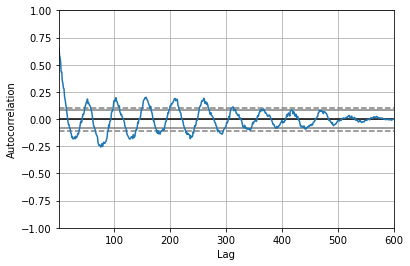

In [58]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['depth_to_groundwater_diff_1'])

plt.show()

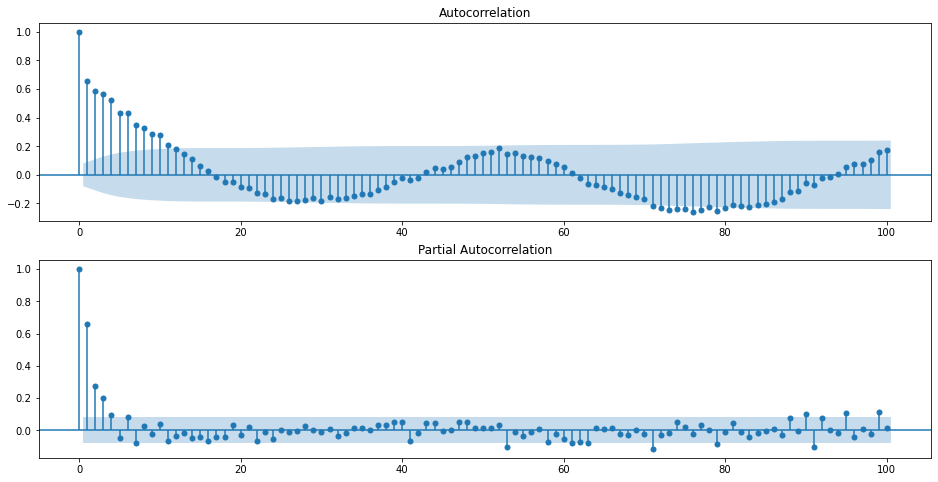

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

# 5. Modelling

Timeseries can be either univariate or multivariate.

## Univariate

the time series has only one time dependent variable

## Multivariate

time series has multiple time depedent variables

But first of all we are going to see, how cross validation going to work in Time Series Analysis.

In [60]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['date']

y = df['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [61]:
folds

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

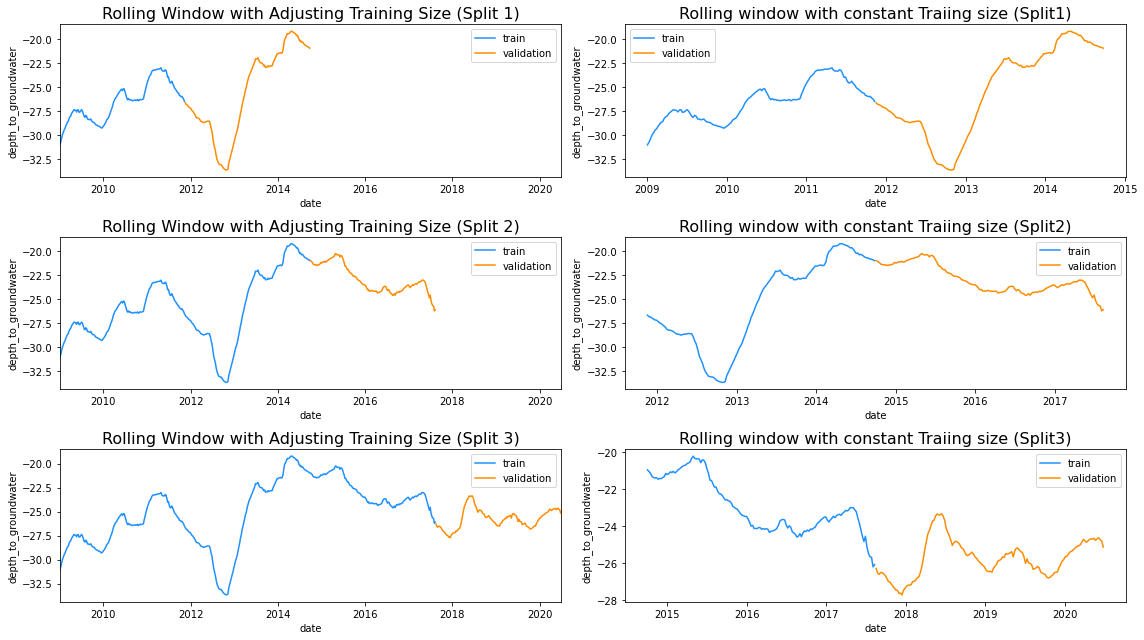

In [62]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16,9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    
    sns.lineplot(x=X_train, y=y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x=X_train[len(X_train) - len(X_valid): (len(X_train) - len(X_valid) + len(X_valid))], y=y_train[len(X_train)-len(X_valid):(len(X_train)-len(X_valid)+len(X_valid))], ax=ax[i,1], color='dodgerblue', label='train')
    for j in range(2):
        sns.lineplot(x=X_valid, y=y_valid, ax=ax[i,j], color='darkorange', label='validation')
        ax[i,0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
        ax[i,1].set_title(f"Rolling window with constant Traiing size (Split{i+1})", fontsize=16)
        
for i in range(N_SPLITS):
    ax[i,0].set_xlim([date(2009,1,1), date(2020,6,30)])
    ax[i,0].set_xlim([date(2009,1,1), date(2020,6,30)])
    
plt.tight_layout()
plt.show()

The idea with this plot is to understand which train and test set we are using to fit model in each iteration.

# 5.1 Models for Univariate Time Series

First of all, we are going to analyze univariate time series forecasting.

### Univariate time series:

Only one variable is varying over time. For example data collected from a sensor measuring room temperature of a room everysecond.Therefore each second you will have only one dimensional value that is temperature. 

In [63]:
train_size = int(0.85*len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()

univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

X_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size,0]), pd.DataFrame(univariate_df.iloc[:train_size,1])

X_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:,0]), pd.DataFrame(univariate_df.iloc[train_size:,1])

len(train), len(X_valid)

(510, 90)

# 5.1.1 Prophet

The first model (which can also handle univariate problem) we are going to use Facebook Prophet.

Prophet or "Facebook Prophet", is an open source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation support trend, seasonality and holidays.

In [64]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\bkumarsingh\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\bkumarsingh\\AppData\\Local\\Temp\\pip-install-vomxihvl\\fbprophet_c51e32c1a6514016883fabf87a33524d\\setup.py'"'"'; __file__='"'"'C:\\Users\\bkumarsingh\\AppData\\Local\\Temp\\pip-install-vomxihvl\\fbprophet_c51e32c1a6514016883fabf87a33524d\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\bkumarsingh\AppData\Local\Temp\pip-wheel-d_bgo9uw'
       cwd: C:\Users\bkumarsingh\AppData\Local\Temp\pip-install-vomxihvl\fbprophet_c51e32c1a6514016883fabf87a33524d\
  Complete output (284 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:C

  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  C:\Users\bkumarsingh\Anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/prim/mat/fun/csr_u_to_z.hpp(28): warning C4267: 'argument': conversion from 'size_t' to 'int', possible loss of data
  C:\Users\bkumarsingh\Anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/prim/mat/fun/matrix_exp_action_handler.hpp(118): warning C4244: 'initializing': conversion from 'double' to 'int', possible loss of data
  C:\Users\bkumarsingh\Anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/prim/mat/fun/to_matrix.hpp(136): warning C4267: 'initializing': conversion from 'size_t' to 'int', possible loss of data
  C:\Users\bkumarsingh\Anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/prim/mat/fun/to_row_vector.hpp(31): warning C4267: 'initializing': conversion from 'size_t' to 'int', possible loss of data
  C:\Users\bkumarsingh\Anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/prim/mat/fun/to_vector.hpp(31): warning C4267: 'initializing': con

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

import math



from fbprophet import Prophet

# Train model

model = Prophet()

model.fit(train)

# X_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set

y_pred = model.predict(X_valid)

# Calculate metrics

score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

# Plot the forecast

f, ax = plt.subplots(1)

f.set_figheight(6)

f.set_figwidth(15)

model.plot(y_pred, ax=ax)

sns.lineplot(x=X_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)

ax.set_xlabel(xlabel='Date', fontsize=14)

ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

# 5.1.2 ARIMA

Second model that I want to try is ARIMA. 

The auto regressive integrated moving average model describes auto correlation in data. The model assumes that the time series is stationary. It consists of 3 main parts. 

Auto-Regressive (AR) filter (Long Term).

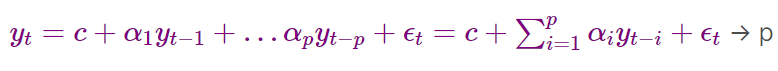

Integration filter (Stocastic trend)

-> d

Moving average filter (Short term):

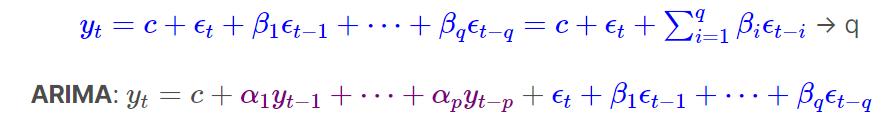

ARIMA (p, d, q)

p: Lag order (reference PACF in autocorrelation analysis)

d: degree of differencing (reference diffrencing in stationary)

q:order of moving average (check out ACF in autocorrelation analysis)

## Steps to analyze ARIMA:

### Step 1 - Check stationary

If a time series has trend or seasonality component, it must be made stationary before we can use ARIMA to forecast.

### Step 2 - Difference:

If time series is not stationary, it needs to be stationarized through diffferencing. Take the first difference then check for staionarity. Take as many differences as it takes. Make sure you check seasonal differencing as well.


### Step 3: Filter out a validation sample:

This will be used to validate, how accurate our model is. Use train test validation split to achive this.

### Step 4: Select AR and MA terms:

Use ACF and PCF to decide whether to use AR term(s), MA term(s) or both.

### Step 5: Build the model:

Build the model and set the number of periods to forecast to N, depedending on your need

### Step 6: Validate Model: 

Compare the predicted values to the actuals in the validation sample:




In [66]:
y_train

,y
0,-31.048571
1,-30.784286
2,-30.420000
3,-30.018571
4,-29.790000
...,...
505,-25.030000
506,-25.194286
507,-25.230000
508,-25.378571


In [67]:
from statsmodels.tsa.arima_model import ARIMA

# fit model

model = ARIMA(y_train, order=(1,1,1))

model_fit = model.fit()

# Prediction with ARIMA

y_pred, se, conf = model_fit.forecast(90)

# Calculate metrics

score_mae = mean_absolute_error(y_valid, y_pred)

score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE {}'.format(score_rmse))

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


RMSE 0.8858255913708776


C:\Users\bkumarsingh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [68]:
score_rmse

0.8858255913708776

In [69]:
X_valid

,ds
510,2018-10-11
511,2018-10-18
512,2018-10-25
513,2018-11-01
514,2018-11-08
...,...
595,2020-05-28
596,2020-06-04
597,2020-06-11
598,2020-06-18


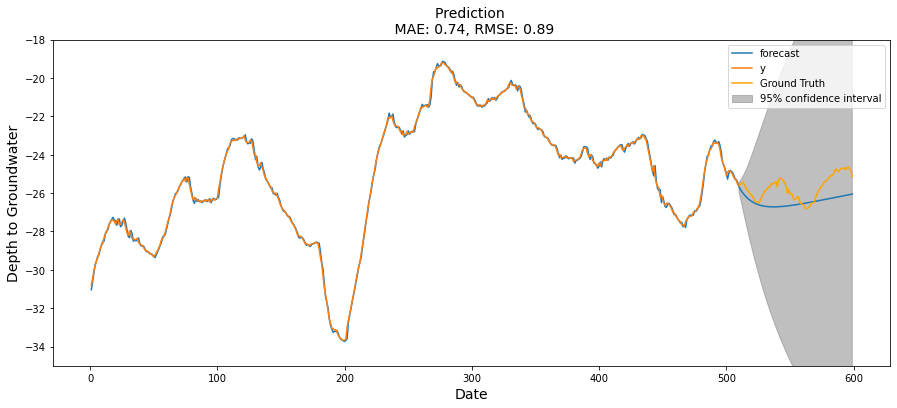

In [70]:
f, ax = plt.subplots(1)

f.set_figheight(6)

f.set_figwidth(15)

model_fit.plot_predict(1, 599, ax=ax)

sns.lineplot(x=X_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground Truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)

ax.set_xlabel(xlabel='Date', fontsize=14)

ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

ax.set_ylim(-35, -18)

plt.show()

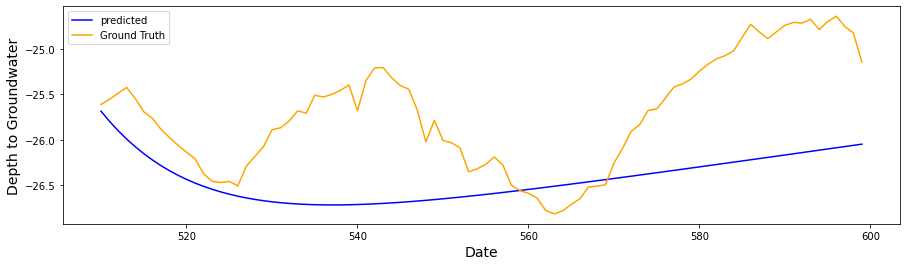

In [71]:
f, ax = plt.subplots(1)

f.set_figheight(4)

f.set_figwidth(15)

sns.lineplot(x=X_valid.index, y=y_pred, ax=ax, color='blue', label='predicted')

sns.lineplot(x=X_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground Truth')

ax.set_xlabel(xlabel='Date', fontsize=14)

ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

# 5.1.3 Auto-ARIMA

In [72]:
!pip install pmdarima

In [73]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1, 
                     test='adf', # use adf test to find optimal d 
                     max_p=3, max_q=3, # maximum p & q
                      m=1, # frequency of series
                      d=None, # let model determine d
                      seasonal=False, # No seasonality
                      start_P = 0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      supresss_warning=True,
                      stepwise=True
                     )

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-631.136, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-242.692, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-574.047, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-427.347, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-243.054, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-629.209, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-629.237, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-492.779, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-611.065, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-628.351, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-632.995, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-428.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-575.735, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-631.069, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  510
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 319.497
Date:                Sat, 01 Jan 2022   AIC                           -632.995
Time:                        15:28:49   BIC                           -620.297
Sample:                             0   HQIC                          -628.016
                                - 510                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9196      0.021     43.766      0.000       0.878       0.961
ma.L1         -0.4885      0.037    -13.357      0.000      -0.560      -0.417
sigma2         0.0167      0.001     24.810      0.000       0.015       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               185.01
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.22
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  510
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 319.497
Date:                Sat, 01 Jan 2022   AIC                           -632.995
Time:                        15:28:49   BIC                           -620.297
Sample:                             0   HQIC                          -628.016
                                - 510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9196      0.021     43.766      0.000       0.878       0.961
ma.L1         -0.4885      0.037    -13.357      0.000      -0.560      -0.417
sigma2         0.0167      0.001     24.810      0.0

As we saw in previos step AutoARIMA validates that (1,1,1) is the best configuration for (p,d,q).

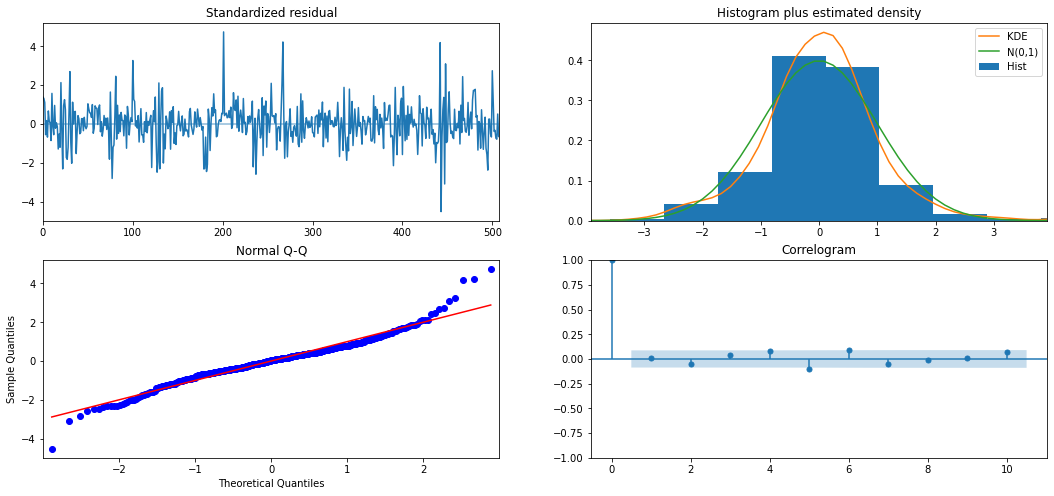

In [75]:
model.plot_diagnostics(figsize=(18,8))
plt.show()

So how to interpret plot diagnostic? 

Top Left - Residual error seems to fluctuate around mean 0 and have a uniform variance between (-4,4).

Top right - The density plot suggest normal density with mean 0

Bottom Left - The most part of blue dot are over the red line, so it seems distribution is very low skewed (not skewed for me)

Bottom Right - The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated.

# 5.1.4 LSTM

We are goin to use a multi layer LSTM recurrent neural network to predict last value of a sequence of values.

The following data preprocessing and feature enginnering needs to be done before constructing LSTM model..

1. Create dataset. Ensure all dataset is float.

2. Normalize the features

3. Split into training and test sets

4. Convert an array of values into a dataset matrix

5. Reshape into X=t and Y = t+1

6. Reshape input to be 3D (num_samples, num_timesteps, num_features)

In [76]:
univariate_df.filter(['y'])

,y
0,-31.048571
1,-30.784286
2,-30.420000
3,-30.018571
4,-29.790000
...,...
595,-24.697143
596,-24.638571
597,-24.751429
598,-24.822857


In [77]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])

# Covert dataframe to a numpy array

dataset = data.values

scaler = MinMaxScaler(feature_range=(-1,0))

scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.81796644],
       [-0.79970385],
       [-0.7745311 ],
       [-0.74679171],
       [-0.73099704],
       [-0.71253702],
       [-0.7023692 ],
       [-0.68410661],
       [-0.66890424],
       [-0.65528134]])

In [79]:
# Define the rolling window

look_back = 52

# Split into train test sets

train, test = scaled_data[:train_size-look_back], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i,0]
        X.append(a)
        Y.append(dataset[i,0])
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train, look_back)

X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, timestep, features]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print(len(X_train), len(X_test))
        

406 90


In [80]:
!pip install keras

In [83]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=eb4b5f0b46586d254dc5818d675367d5c9e8754b87850e11adbdf46901f4bf89
  Stored in directory: c:\users\bkumarsingh\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [84]:
from keras.models import Sequential

from keras.layers import Dense, LSTM

# Build LSTM model

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

# compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

model.fit(X_train, y_train, batch_size=1, validation_data=(X_test, y_test))

model.summary()

406/406 [==============================] - 4s 5ms/step - loss: 0.0102 - val_loss: 5.3832e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            92672     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 143,731
Trainable params: 143,731
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Let's predict with the model

train_predict = model.predict(X_train)

test_predict = model.predict(X_test)

# Invert predictions

train_predict = scaler.inverse_transform(train_predict)

y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)

y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error RMSE and MAE

score_rmse = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
    
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])

print(score_rmse)
    


0.3357629555996684


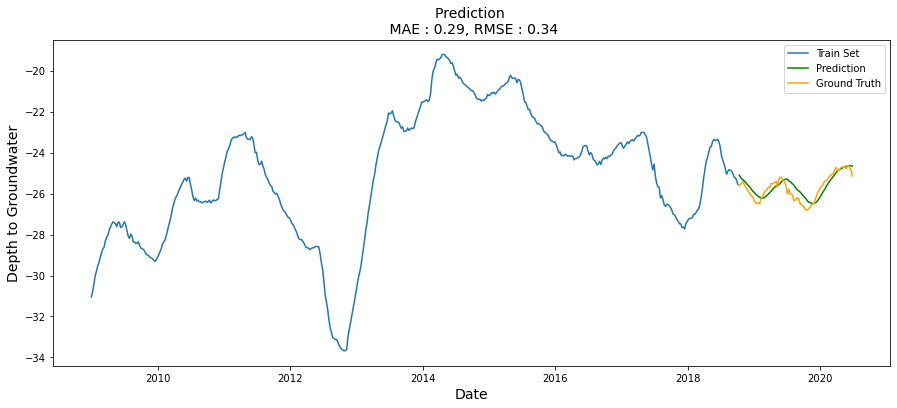

In [86]:
X_train_ticks = univariate_df.head(train_size)['ds']

y_train = univariate_df.head(train_size)['y']

X_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast

f, ax = plt.subplots(1)

f.set_figheight(6)

f.set_figwidth(15)

sns.lineplot(x=X_train_ticks, y=y_train, ax=ax, label='Train Set')

sns.lineplot(x=X_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction')

sns.lineplot(x=X_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground Truth')

ax.set_title(f'Prediction \n MAE : {score_mae:.2f}, RMSE : {score_rmse:.2f}', fontsize=14)

ax.set_xlabel(xlabel='Date', fontsize=14)

ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

# 5.2 Models for multivariate time series

Finally, we are going to analyze multivariate time series.

## Multivariate time series:

Multiple variables are varying over time. For example a tri-axial accelarometer. There are three accelarations one for each axis (x,y,z) and they vary simultaneously over time. 

In [88]:
feature_columns = ['rainfall', 'temperature', 'drainage_volume', 'river_hydrometri']

target_column = ['depth_to_groundwater']

train_size = int(0.85*len(df))

multivariate_df = df[['date'] + target_column + feature_columns].copy()

multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]

X_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size,1])

X_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[train_size:,1])

train.head()

,ds,y,rainfall,temperature,drainage_volume,river_hydrometri
0,2009-01-01,-31.048571,0.000000,1.657143,-28164.918857,2.371429
1,2009-01-08,-30.784286,0.285714,4.571429,-29755.789714,2.314286
2,2009-01-15,-30.420000,0.028571,7.528571,-25463.190857,2.300000
3,2009-01-22,-30.018571,0.585714,6.214286,-23854.422857,2.500000
4,2009-01-29,-29.790000,1.414286,5.771429,-25210.532571,2.500000


# 5.2.1 Multivariate Prophet

from fbprophet import Prophet

# Train the model

model = Prophet()

model.add_regressor('rainfall')

model.add_regressor('temperature')

model.add_regressor('drainage_volume')

model.add_regressor('river_hydrometri')

# fit model with train set

model.fit(train)

# Predict on valid set

y_pred = model.predict(X_valid)

# Calculate metrics

score_mae = mean_absolute_error(y_valid, y_pred['yhat'])

score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(rmse)

# Plot the forecast

f, ax = plt.subplots(1)

f.set_figheight(6)

f.set_figwidth(15)

model.plot(y_pred, ax=ax)

sns.lineplot(x=X_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground Truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)

ax.set_xlabel('Date', fontsize=14)

ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

# Conclusions

The best results are taken from univariate LSTM (with rolling window of 1 year) and multivariate Prophet